## Regression between atmospheric contribution to SLH and SST using observational data from 1950 - 2015



In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/SST/code')

import import_data as imprt
import regression as regr
import figures as fig

### Import and plot wind contribution to sea level data

The annual data has been detrended

In [2]:
df_era5, df_20cr = imprt.import_obs_ac_slh_data()


In [3]:
# Select period 1950 - 2015
df_era5 = df_era5.loc[1950:2015]
df_20cr = df_20cr.loc[1950:2015]

(1950.0, 2015.0)

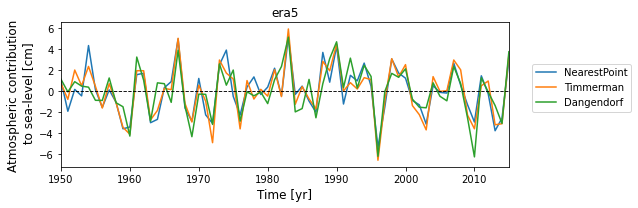

In [4]:
import matplotlib.pyplot as plt

fig.plot_df_timeseries(df_era5, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'era5')
plt.xlim(1950,2015)

(1950.0, 2015.0)

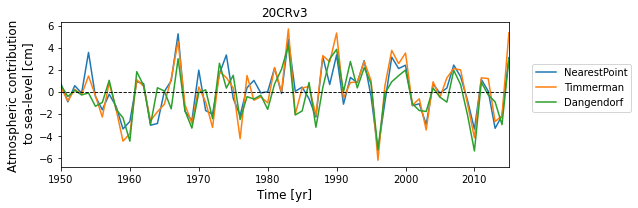

In [5]:
fig.plot_df_timeseries(df_20cr, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3')
plt.xlim(1950,2015)


(1950.0, 2015.0)

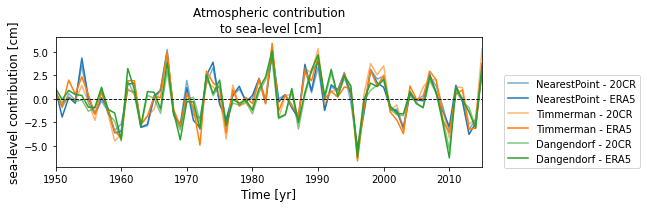

In [6]:
fig.plot_era5_20cr_timeseries(df_era5, df_20cr)
plt.xlim(1950,2015)

### Import and plot SST data

There are two observational SST products: SST and SKT 


SST: sea surface temperature (NOAA Extended Reconstructed Sea Surface Temperature (SST) V5)

SKT: skin temperature? (NOAA-CIRES-DOE Twentieth Century Reanalysis (V3))

In [7]:
da_sst, da_skt = imprt.import_obs_sst_data()

In [8]:
# Select period 1950 - 2015
da_sst = da_sst.where((da_sst.year<2016) & (da_sst.year>1949), drop=True)
da_skt = da_skt.where((da_sst.year<2016) & (da_sst.year>1949), drop=True)

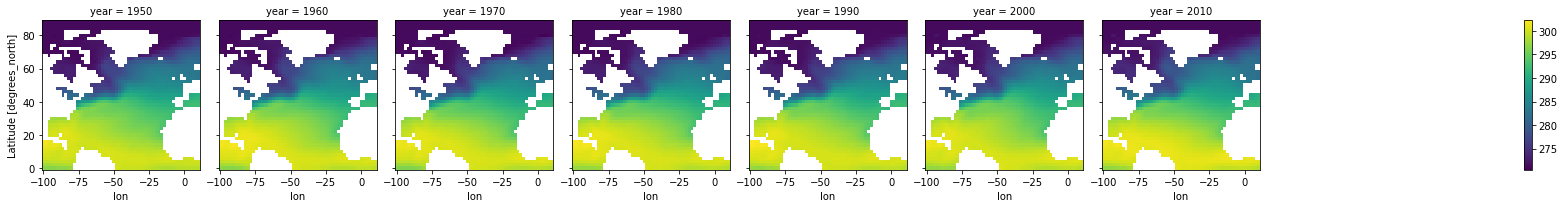

In [9]:
years = range(1860, 2020, 10)
da_sst.where(da_sst.year.isin(years), drop = True).plot(col = 'year', col_wrap = 8)

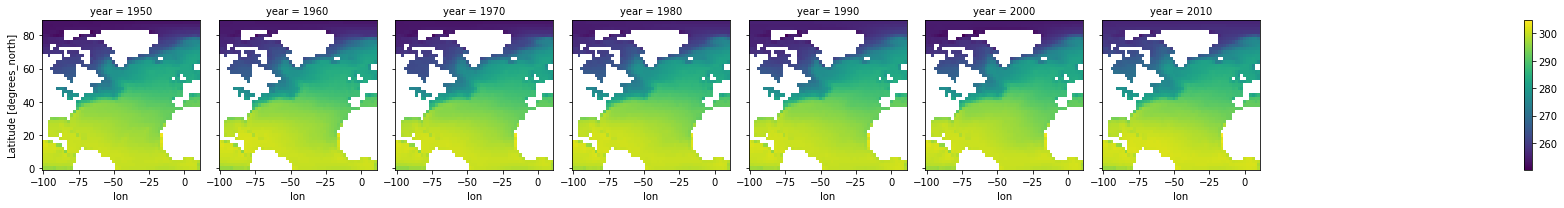

In [10]:
years = range(1860, 2020, 10)
da_skt.where(da_skt.year.isin(years), drop = True).plot(col = 'year', col_wrap = 8)

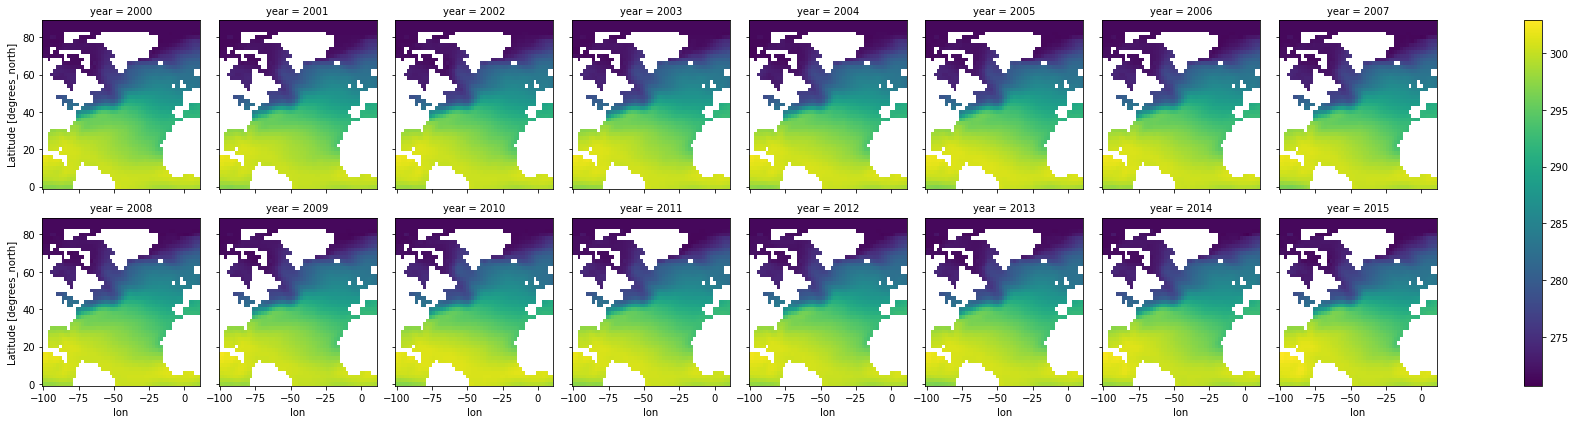

In [11]:
years = range(2000, 2020)
da_sst.where(da_sst.year.isin(years), drop = True).plot(col = 'year', col_wrap = 8)

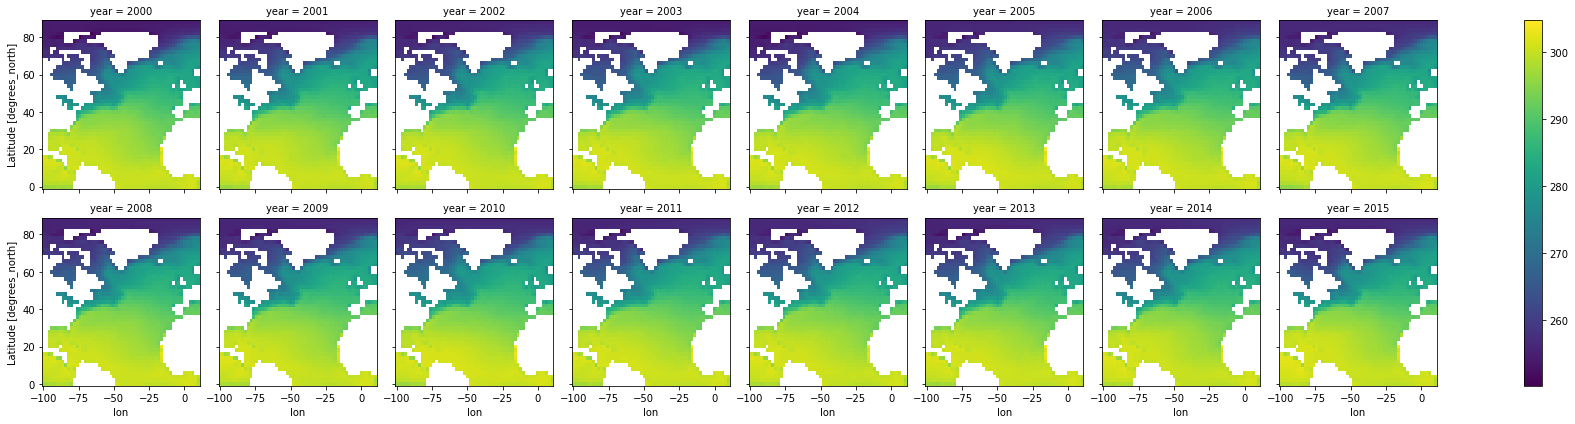

In [12]:
years = range(2000, 2020)
da_skt.where(da_skt.year.isin(years), drop = True).plot(col = 'year', col_wrap = 8)

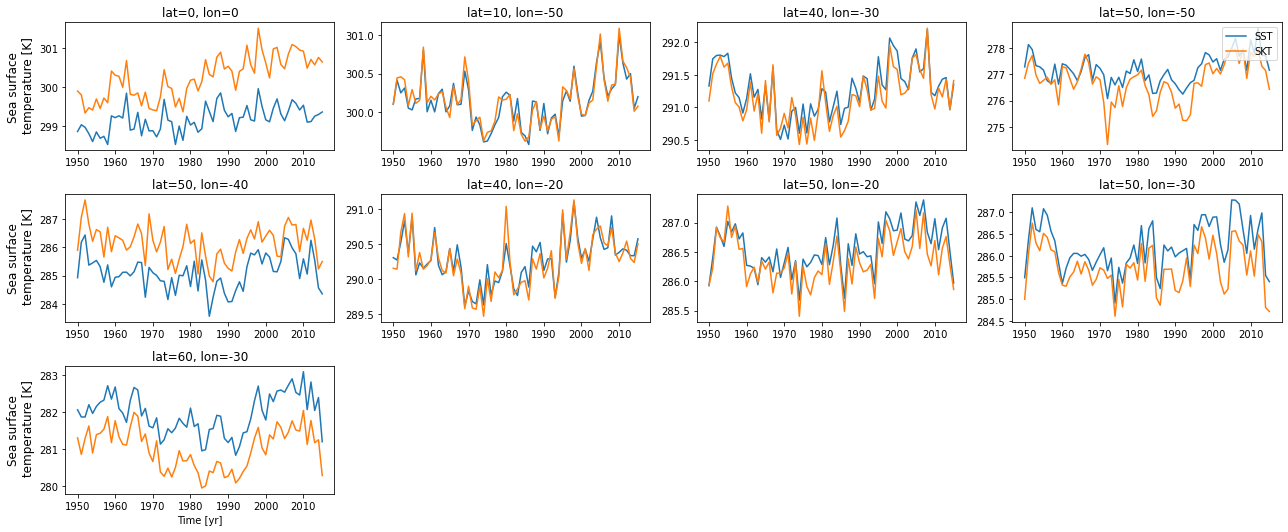

In [13]:
locations = [[0,0], [10,-50], [40,-30], [50,-50], [50, -40], [40, -20], [50, -20], [50, -30], [60, -30]]

fig.plot_sst_timeseries(da_sst, da_skt, locations, name = '')

### Perform regression for 31y window


A lagged regression is performed between each SST time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 31 y window

In [14]:
df_era5_31, df_20cr_31 = imprt.import_obs_ac_slh_data(smoothed = True)


In [15]:
# Select period 1950 - 2015
df_era5_31 = df_era5_31.loc[1950:2015]
df_20cr_31 = df_20cr_31.loc[1950:2015]

In [16]:
da_sst_31, da_skt_31 = imprt.import_obs_sst_data(smoothed = True)

/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
# Select period 1950 - 2015
da_sst_31 = da_sst_31.where((da_sst_31.year<2016) & (da_sst_31.year>1949), drop=True)
da_skt_31 = da_skt_31.where((da_sst_31.year<2016) & (da_sst_31.year>1949), drop=True)

#### Plot regression input

(1950.0, 2015.0)

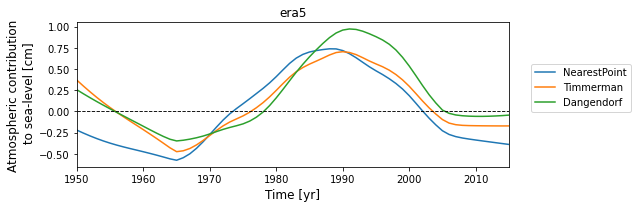

In [18]:
fig.plot_df_timeseries(df_era5_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'era5')
plt.xlim(1950,2015)

(1950.0, 2015.0)

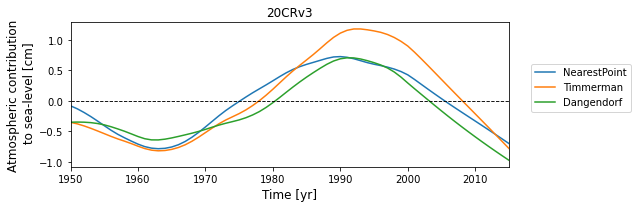

In [19]:
fig.plot_df_timeseries(df_20cr_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3')
plt.xlim(1950,2015)

(1950.0, 2015.0)

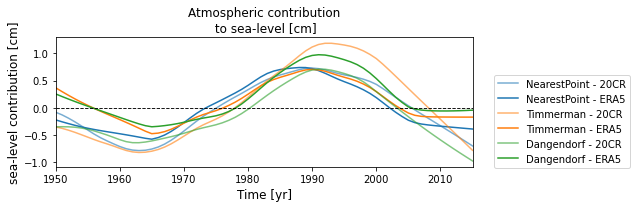

In [20]:
fig.plot_era5_20cr_timeseries(df_era5_31, df_20cr_31)
plt.xlim(1950,2015)

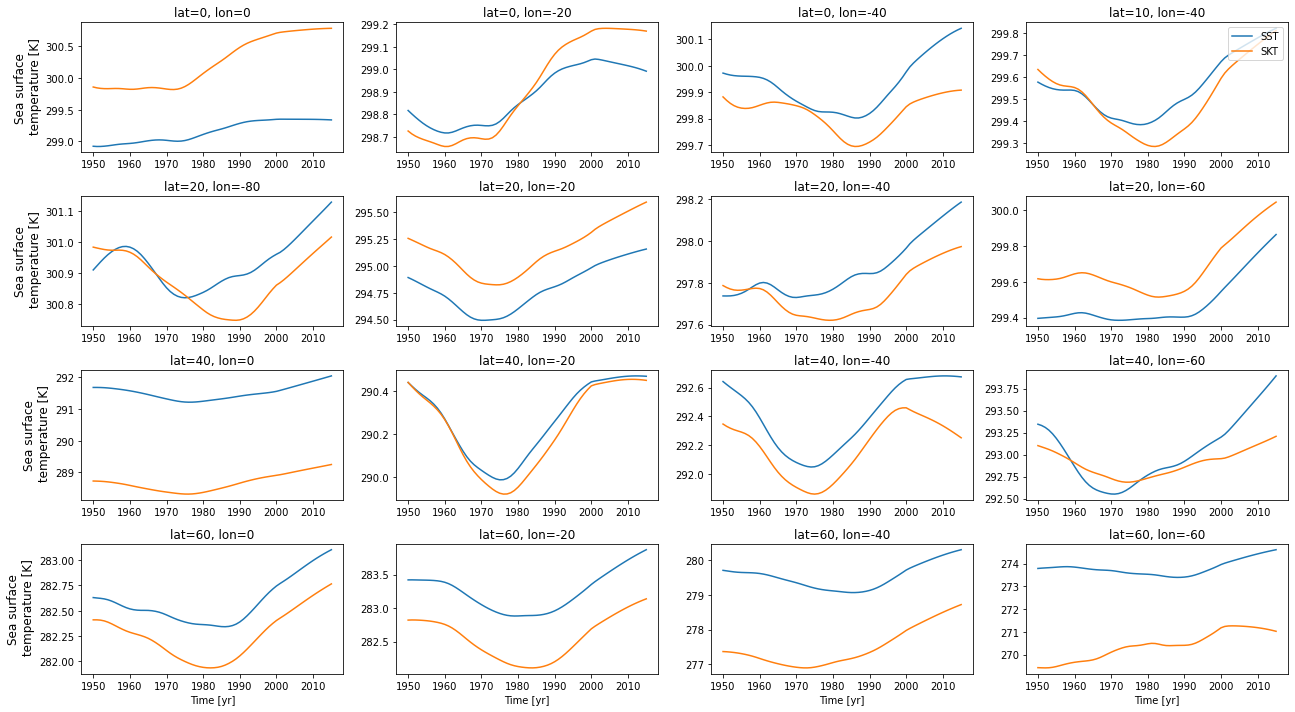

In [21]:
locations = [[0,0], [0,-20], [0,-40], [10,-40], 
             [20,-80], [20,-20], [20,-40], [20,-60],
             [40,0], [40,-20], [40,-40], [40,-60],
            [60,0], [60,-20], [60,-40], [60,-60]]

fig.plot_sst_timeseries(da_sst_31, da_skt_31, locations, name = '')

#### Perform regression
The regression is performed between the 20cr and era5 atmospheric contribution to sea level data and sst and skt products for each grid point of sst and skt data

In [ ]:
results_sst_era5_31, timeseries_sst_era5_31 = regr.lagged_regression(da_sst_31, df_era5_31)

In [ ]:
results_sst_20cr_31, timeseries_sst_20cr_31 = regr.lagged_regression(da_sst_31, df_20cr_31)

#### Show regression results

#### R$^2$

In [ ]:
results_sst_era5_31

In [ ]:
lags = range(0,6)

results_sst_era5_31.r2.where(results_sst_era5_31.lag.isin(lags), drop = True).plot(row = 'wind model', col = 'lag')

In [ ]:
lags = range(0,6)
import matplotlib.pyplot as plt
results_sst_20cr_31.r2.where(results_sst_20cr_31.lag.isin(lags), drop = True).plot(row = 'wind model', col = 'lag')
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/r2_20cr_05', bbox_inches = 'tight')

In [ ]:
lags = range(6,11)

results_sst_20cr_31.r2.where(results_sst_20cr_31.lag.isin(lags), drop = True).plot(row = 'wind model', col = 'lag')
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/r2_20cr_610', bbox_inches = 'tight')

#### Regression coefficient

In [ ]:
lags = range(0,6)

results_sst_20cr_31.reg_coef.where(
    results_sst_20cr_31.lag.isin(lags) &
    results_sst_20cr_31.lat.isin(range(10,81,2))
    , drop = True).plot(
    row = 'wind model', col = 'lag', vmax=.8)
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/coefs_20cr_05', bbox_inches = 'tight')

In [ ]:
lags = range(6,11)

results_sst_20cr_31.reg_coef.where(
    results_sst_20cr_31.lag.isin(lags) &
    results_sst_20cr_31.lat.isin(range(10,81,2))
    , drop = True).plot(
    row = 'wind model', col = 'lag', vmax=.8)
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/coefs_20cr_610', bbox_inches = 'tight')

In [ ]:
lags = range(0,6)

results_sst_era5_31.reg_coef.where(
    results_sst_era5_31.lag.isin(lags) &
    results_sst_era5_31.lat.isin(range(10,81,2))
    , drop = True).plot(
    row = 'wind model', col = 'lag', vmax=.8)
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/coefs_era5_05', bbox_inches = 'tight')

#### Create plots for report

In [ ]:
results_sst_era5_31.sel(lag = 0).r2.plot(col = 'wind_model')

In [ ]:
results_sst_era5_31

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_sst_era5_31.r2.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 vmin = 0.0, vmax = 0.7, col='wind_model', col_wrap=3,  # multiplot settings
                 aspect=results_sst_era5_31.dims['lon'] / results_sst_era5_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':'R$^2$'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/1950_2015/SST_r2_era5.png', 
            bbox_inches='tight')  

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_sst_era5_31.reg_coef.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 col='wind_model', col_wrap=3,  # multiplot settings
                vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r',
                 aspect=results_sst_era5_31.dims['lon'] / results_sst_era5_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':r'$\beta$'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/1950_2015/SST_reg_coef_era5.png', 
            bbox_inches='tight')  

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_sst_20cr_31.r2.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 vmin = 0.0, vmax = 0.7, col='wind_model', col_wrap=3,  # multiplot settings
                 aspect=results_sst_20cr_31.dims['lon'] / results_sst_20cr_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':'R$^2$'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
            
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/1950_2015/SST_r2_20cr.png', 
            bbox_inches='tight')     

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_sst_20cr_31.reg_coef.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 col='wind_model', col_wrap=3,  # multiplot settings
                vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r',
                 aspect=results_sst_20cr_31.dims['lon'] / results_sst_20cr_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':r'$\beta$'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/1950_2015/SST_reg_coef_20cr.png', 
            bbox_inches='tight')  